# Multilingual STT(ATR)-TTS Synthesizer

# Translate with your own voice - Whisper
PhD. Joel Omar Juarez Gambino

Team:

* Armas Ramirez Daniel
* Prezas Bernal Emiliano
* Escamilla Gachuz Karla Esther
* Dorado Alcala Nathaly



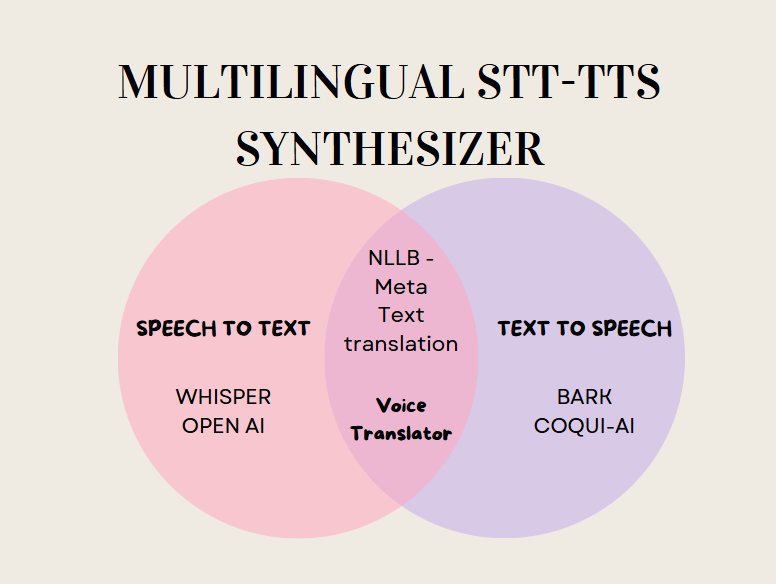

## Whisper Speech To Text

1. Install tools, set dependencies

Download Whisper


We also need the following in order to record audio from this notebook and process the resulting files.

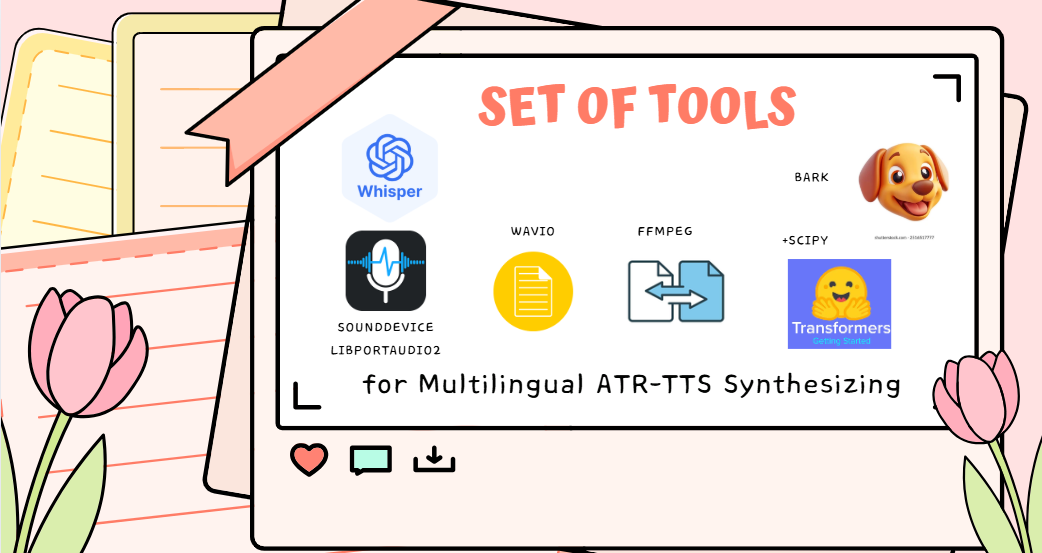

In [ ]:
! pip install git+https://github.com/openai/whisper.git
! pip install sounddevice wavio
! pip install ipywebrtc notebook
!apt install ffmpeg!apt-get install libportaudio2
!pip install git+https://github.com/suno-ai/bark.git
!pip install git+https://github.com/huggingface/transformers.git
!pip install scipy

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-d8zo6r47
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-d8zo6r47
  Resolved https://github.com/openai/whisper.git to commit dd985ac4b90cafeef8712f2998d62c59c3e62d22
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━

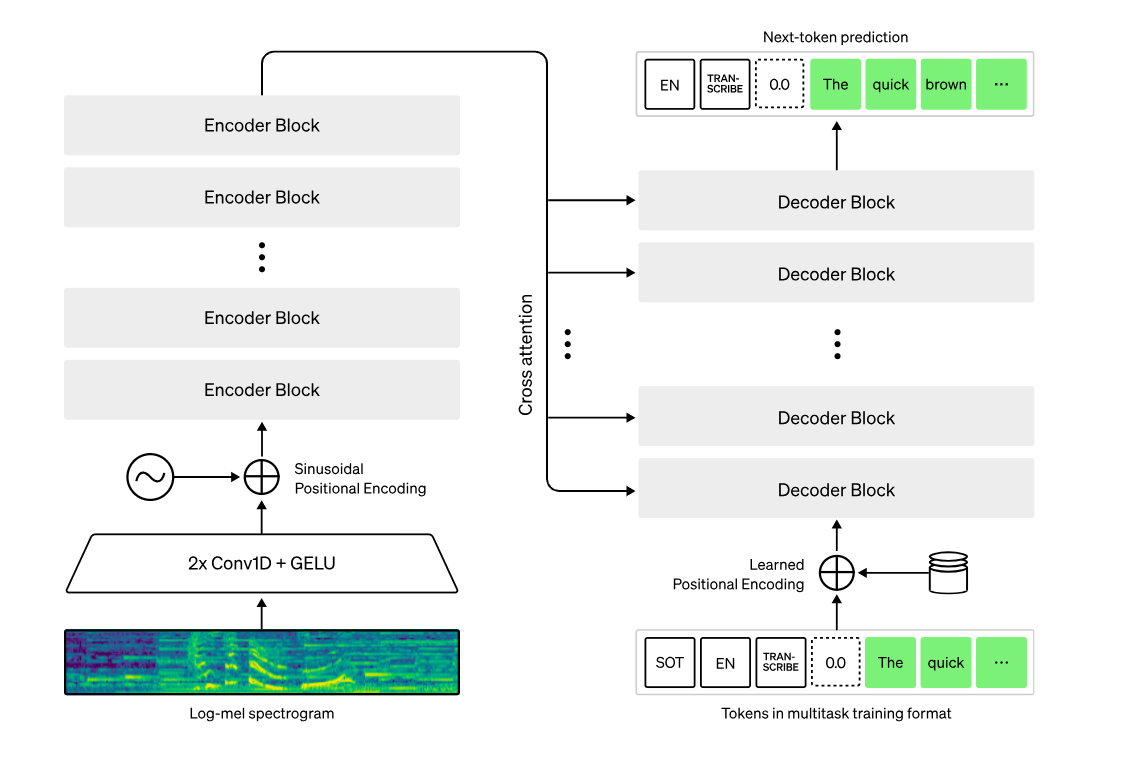

From Whisper's OPEN AI [Documentation](https://openai.com/index/whisper/)

In [ ]:
import os
import numpy as np

try:
    import tensorflow
except ImportError:
    pass

import torch
import pandas as pd
import whisper
import torchaudio

from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio, display
import ipywidgets as widgets

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Make your recording

1. Load widgets in colab

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
camera = CameraStream(constraints={'audio': True,'video':False})
recorder1 = AudioRecorder(stream=camera)
recorder1

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

2. Transform the audio to WAV for the model

In [ ]:
with open('record.webm', 'wb') as f:
    f.write(recorder1.audio.value)
!ffmpeg -i record.webm -ac 1 -f wav my_recording.wav -y -hide_banner -loglevel panic

## Select Language and mode

1. We set the model for multilingual listening obtaining the set of languages

In [ ]:
language_options = whisper.tokenizer.TO_LANGUAGE_CODE
language_list = list(language_options.keys())
language_list

## Load Whisper model

In [ ]:
wmodel = whisper.load_model("base")
print(
    f"Model is {'multilingual' if wmodel.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in wmodel.parameters()):,} parameters."
)

Model is multilingual and has 71,825,920 parameters.


### Whisper parameter setting to complete the task

In [ ]:
options = whisper.DecodingOptions(task='transcribe', without_timestamps=True)
options

DecodingOptions(task='transcribe', language=None, temperature=0.0, sample_len=None, best_of=None, beam_size=None, patience=None, length_penalty=None, prompt=None, prefix=None, suppress_tokens='-1', suppress_blank=True, without_timestamps=True, max_initial_timestamp=1.0, fp16=True)

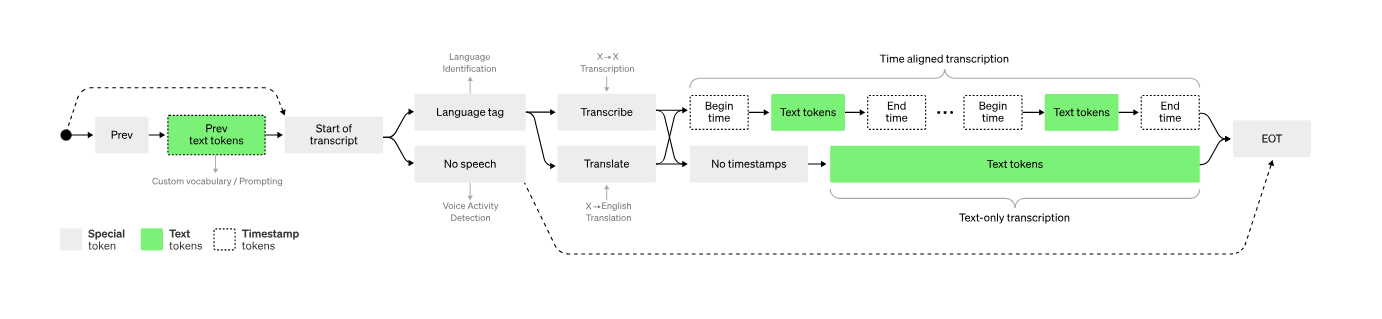

From Whisper's OPEN AI [Documentation](https://openai.com/index/whisper/)

## Start transcribing

Time to load our file and see the results

In [ ]:
audio = whisper.load_audio("record.webm")
audio = whisper.pad_or_trim(audio)
mel = whisper.log_mel_spectrogram(audio).to(wmodel.device)
result = wmodel.decode(mel, options)

In [ ]:
result.text

'ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को'

### Which language did I speak?

In [ ]:
_, probs = wmodel.detect_language(mel)
detected_lang = max(probs, key=probs.get)

print(f"Language code: {detected_lang}")

Language code: hi


# Multilingual translation using NLLB (No Language Left Behind) from Meta


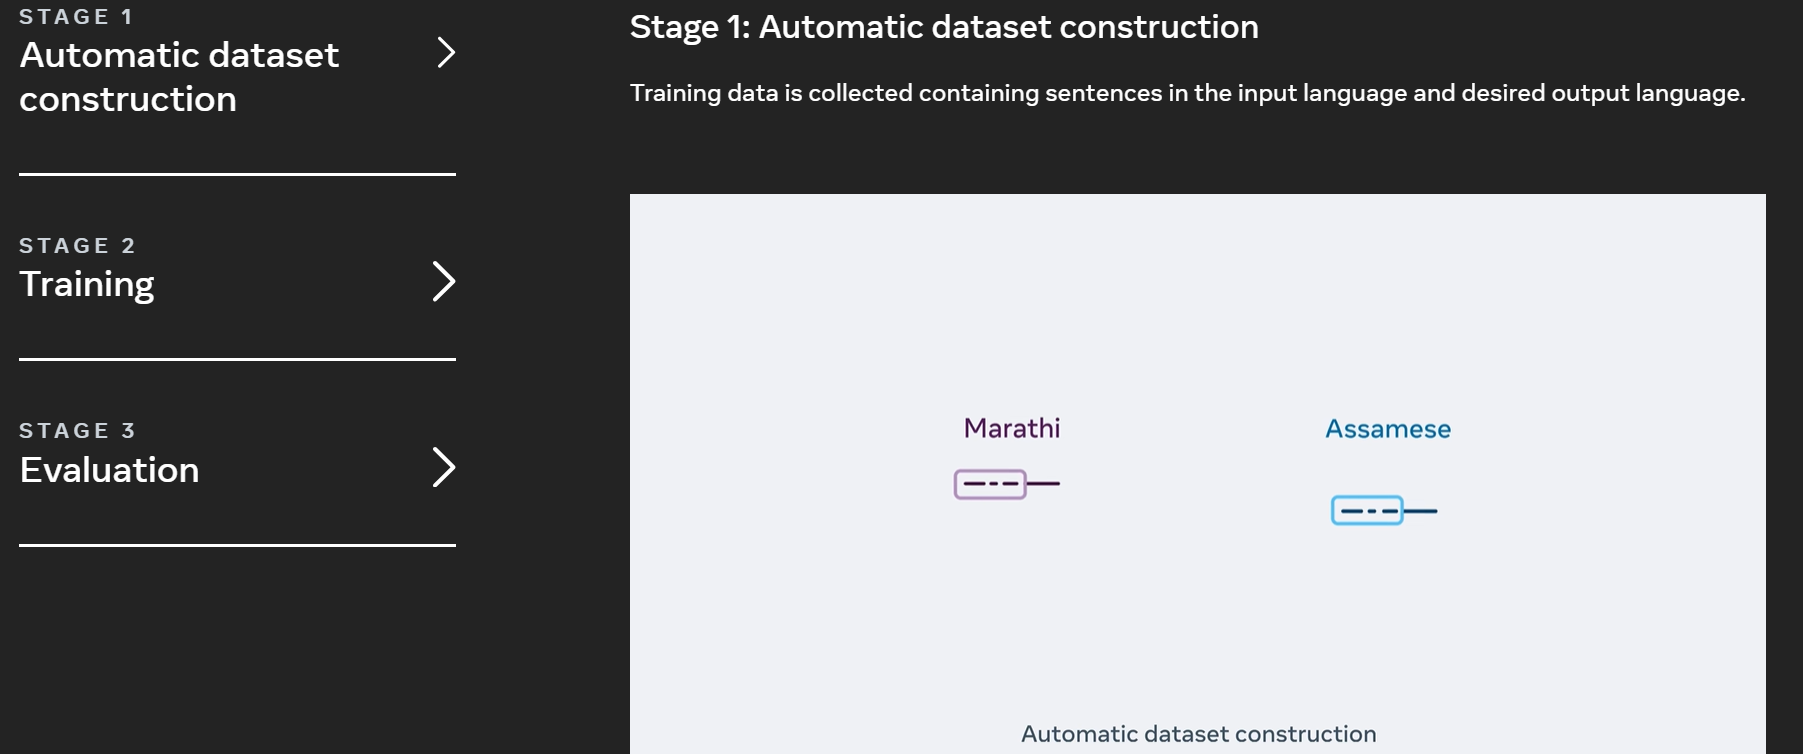

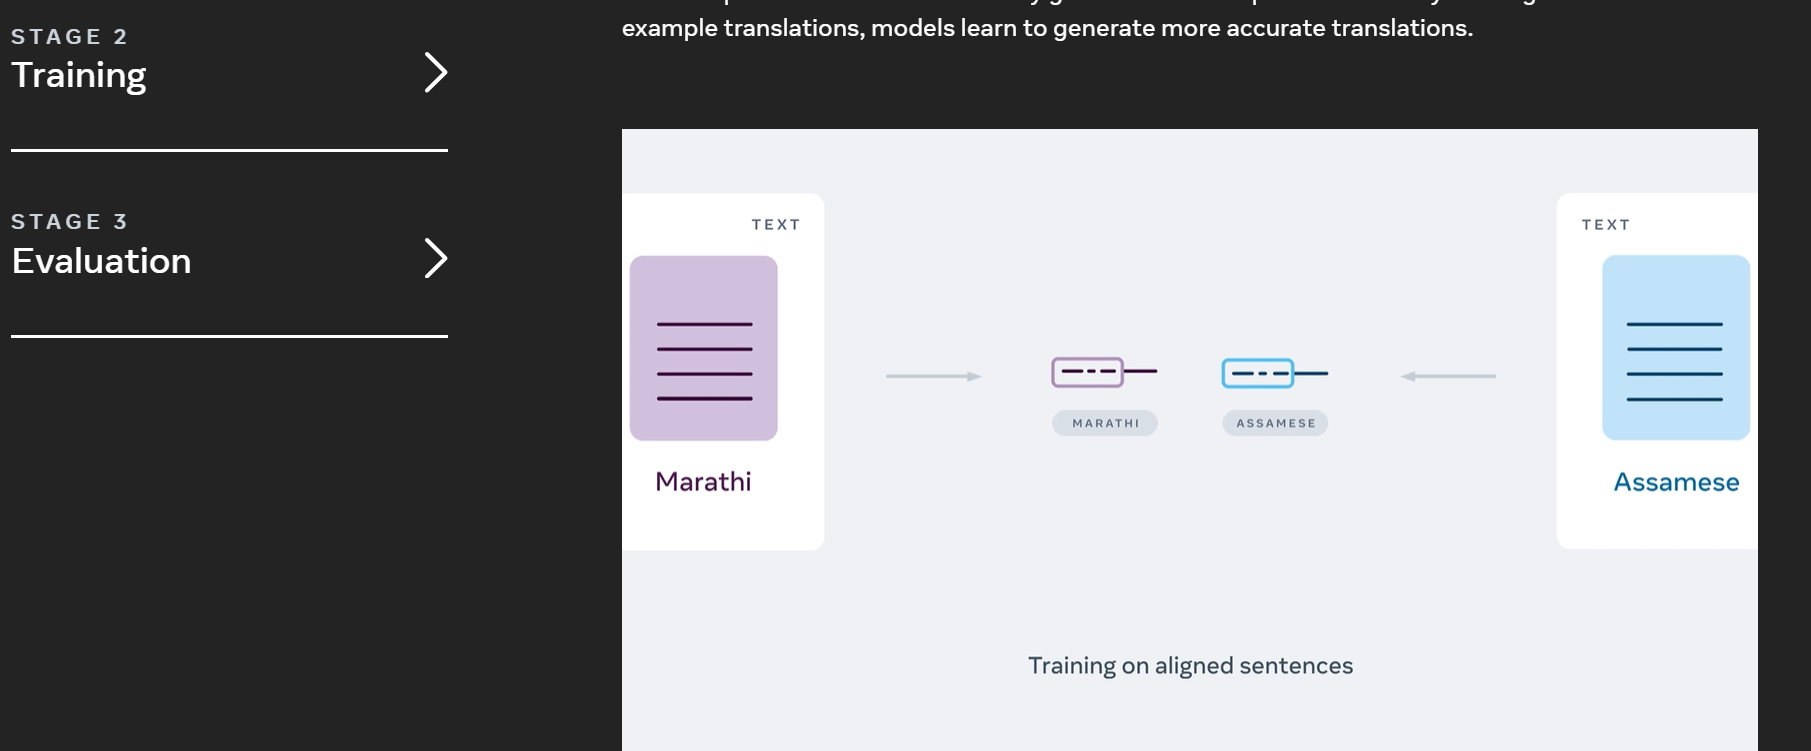

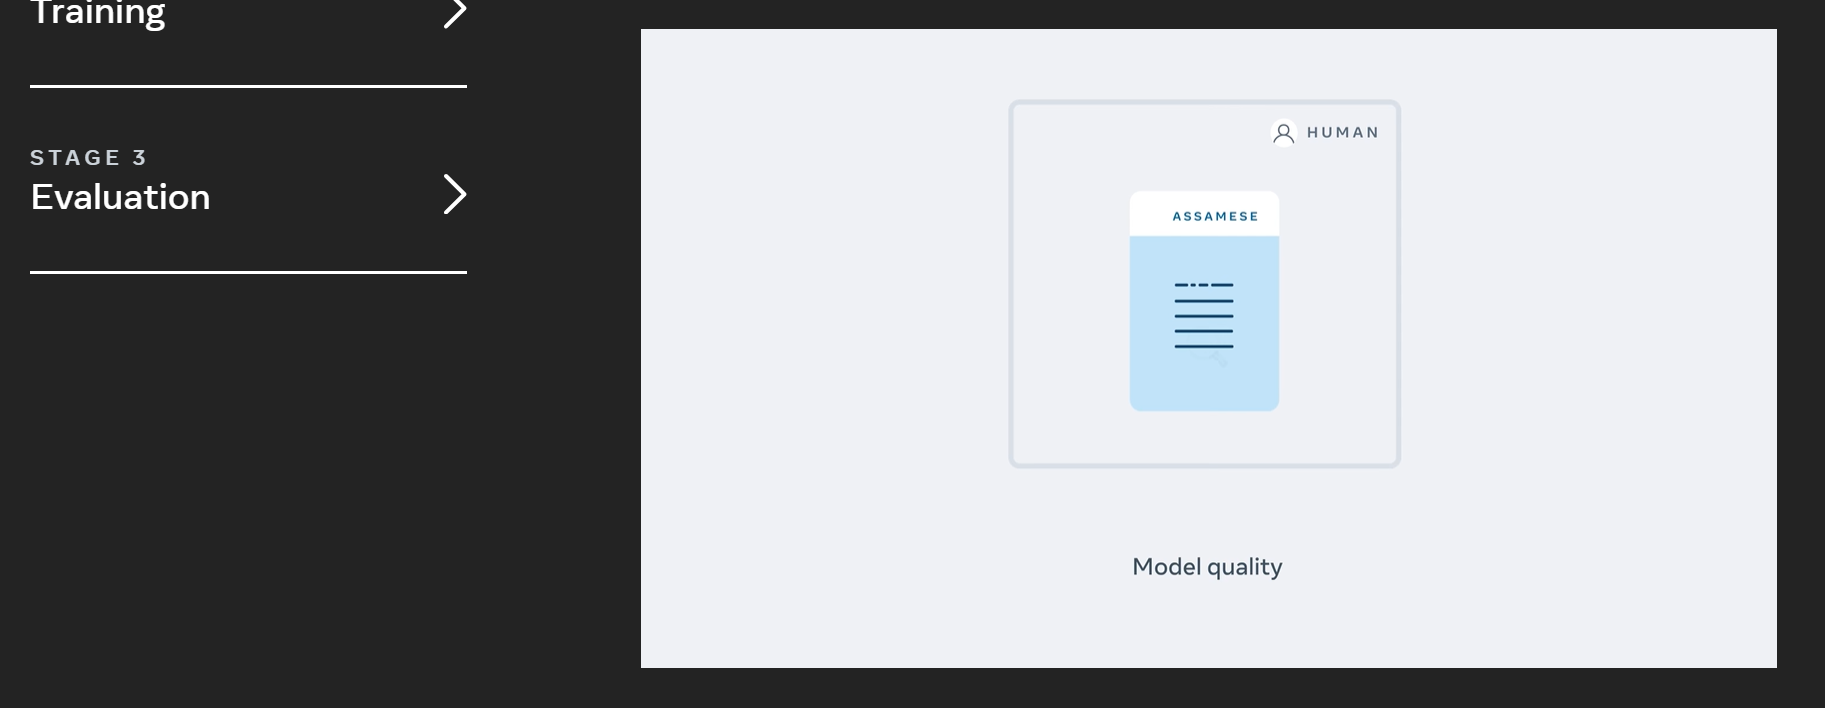

*From NLLB Meta's [Documenation](https://ai.meta.com/research/no-language-left-behind/)*

### 1. Building translation architecture

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

#pretrained Meta translator
model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(DEVICE)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

### 2. Setting languages

In [ ]:
#language list
languages = {
    'spanish': 'spa_Latn',
    'urdu': 'urd_Arab',
    'russian': 'rus_Cyrl',
    'english': 'eng_Latn',
    'korean': 'kor_Hang',
    'japanese': 'jpn_Jpan',
    'chinese': 'zho_Hans',
    'french': 'fra_Latn',
    'italian': 'ita_Latn',
    'german': 'deu_Latn'
}

### 3. Defining Transtalion Function (Decoding)

In [ ]:
def translate(text, destination_lang):
    if destination_lang not in languages:
        raise ValueError("Language not found.")

    target_lang = languages[destination_lang]

    #tokenize
    inputs = tokenizer(text, return_tensors="pt").to(DEVICE)

    #getting target id
    target_lang_id = tokenizer.convert_tokens_to_ids(target_lang)

    #translate
    translated_tokens = model.generate(
        **inputs,
        forced_bos_token_id=target_lang_id,
        max_length=200
    )

    #decoding results
    translation = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translation

### 5. Testing

**Korean**

In [ ]:
corpus = result.text
idioma = "korean"

traduccion1 = translate(corpus, idioma)
print(f"Original text: {corpus}")
print(f"Translated to {idioma}: {traduccion1}")

Original text: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Translated to korean: 저 는 내 종을 알게 될 것 이다


**English**

In [ ]:
idioma = "english"

traduccion2 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion2}")

Texto original: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Traducción a english: I will know my Lord


**Spanish**

In [ ]:
idioma = "spanish"

traduccion3 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion3}")

Texto original: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Traducción a spanish: Y el cielo se enterará de mi nombre.


**Japanese**

In [ ]:
idioma = "japanese"

traduccion4 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion4}")

Texto original: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Traducción a japanese:  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  ()  () 


**Chinese**

In [ ]:
idioma = "chinese"

traduccion5 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion5}")

Texto original: سلام کیسے ہیں آپ
Traducción a chinese: 你好,你怎么样?


**French**

In [ ]:
idioma = "french"

traduccion6 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion6}")

Texto original: سلام کیسے ہیں آپ
Traducción a french: Bonjour, comment allez-vous ?


**Italian**

In [ ]:
idioma7 = "italian"

traduccion7 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion7}")

Texto original: سلام کیسے ہیں آپ
Traducción a urdu: سلام آپ کیسے ہیں


**Russian**

In [ ]:
idioma = "russian"

traduccion8 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion8}")

Texto original: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Traducción a russian: И я знаю, что ты не знаешь моего имени.


**Urdu**

In [ ]:
idioma = "urdu"

traduccion9 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion9}")

Texto original: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Traducción a urdu: اور میری جان کو بھی جان لے گا


**German**

In [ ]:
idioma = "german"

traduccion10 = translate(corpus, idioma)
print(f"Texto original: {corpus}")
print(f"Traducción a {idioma}: {traduccion10}")

Texto original: ज़़ साया बाशान को जान ग़ाणगगे मेरे नाब को
Traducción a german: Und die Schatten werden mich erfahren.


# Text to Speech (TTS) using Bark model: Synthesize phase


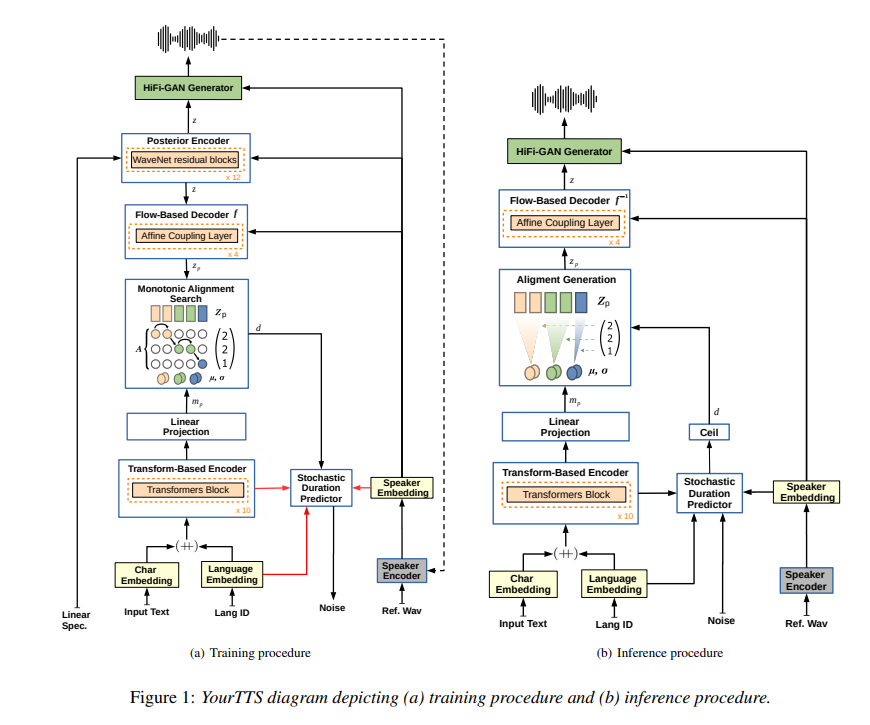

From the Coqui-ai's YourTTS [paper](https://arxiv.org/abs/2112.02418). Bark does not have paper, but has [repo](https://github.com/suno-ai/bark).

### 2. Setting model load

In [ ]:
from transformers import AutoProcessor, BarkModel
from IPython.display import Audio
import scipy

processor = AutoProcessor.from_pretrained("suno/bark")
model = BarkModel.from_pretrained("suno/bark")

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

speaker_embeddings_path.json:   0%|          | 0.00/61.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

In [ ]:
voice_presets = {
    "spanish": {"male": "v2/es_speaker_0", "female": "v2/es_speaker_1"},
    "english": {"male": "v2/en_speaker_6", "female": "v2/en_speaker_1"},
    "french": {"male": "v2/fr_speaker_0", "female": "v2/fr_speaker_1"},
    "italian": {"male": "v2/it_speaker_0", "female": "v2/it_speaker_1"},
    "korean": {"male": "v2/ko_speaker_0", "female": "v2/ko_speaker_4"},
    "japanese": {"male": "v2/ja_speaker_0", "female": "v2/ja_speaker_4"},
    "chinese": {"male": "v2/zh_speaker_0", "female": "v2/zh_speaker_4"},
    "russian": {"male": "v2/ru_speaker_0", "female": "v2/ru_speaker_1"},
    "german": {"male": "v2/de_speaker_0", "female": "v2/de_speaker_1"},
}

### 3. Generating voice

In [ ]:
def generate_bark_audio(text, language, gender="neutral", filename=None):
    language = language.lower()
    gender = gender.lower()

    if language not in languages:
        raise ValueError(f"Unsupported language: {language}. Available options: {list(languages.keys())}")

    if gender not in ["male", "female", "neutral"]:
        raise ValueError("Invalid gender. Choose 'male', 'female', or 'neutral'.")

    #corresponding voice
    voices = voice_presets.get(language)

    if voices is None:
        print(f"No voices defined for '{language}'. Using Spanish female voice as fallback.")
        voice_preset = "v2/es_speaker_1"
    elif gender == "neutral":
        voice_preset = list(voices.values())[0]
    else:
        voice_preset = voices.get(gender)
        if voice_preset is None:
            print(f"No '{gender}' voice found for '{language}'. Using female voice as fallback.")
            voice_preset = voices.get("female", "v2/es_speaker_1")

    #generating audio
    inputs = processor(text, voice_preset=voice_preset)
    audio_array = model.generate(**inputs).cpu().numpy().squeeze()
    sample_rate = model.generation_config.sample_rate

    if filename is None:
        filename = f"audio_{language}_{gender}.wav"
    elif not filename.endswith(".wav"):
        filename += ".wav"

    scipy.io.wavfile.write(filename, rate=sample_rate, data=audio_array)
    print(f"Audio saved as: {filename}")

    return Audio(audio_array, rate=sample_rate)


In [ ]:
generate_bark_audio(
    text=traduccion1,
    language="korean",
    gender="male"
)

ko_speaker_0_semantic_prompt.npy:   0%|          | 0.00/2.70k [00:00<?, ?B/s]

ko_speaker_0_coarse_prompt.npy:   0%|          | 0.00/7.86k [00:00<?, ?B/s]

ko_speaker_0_fine_prompt.npy:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
generate_bark_audio(
    text=traduccion2,
    language="english",
    gender="male"
)

en_speaker_6_semantic_prompt.npy:   0%|          | 0.00/2.60k [00:00<?, ?B/s]

en_speaker_6_coarse_prompt.npy:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

en_speaker_6_fine_prompt.npy:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Audio saved as: audio_english_male.wav


In [ ]:
generate_bark_audio(
    text=traduccion3,
    language="spanish",
    gender="male"
)

In [ ]:
generate_bark_audio(
    text=traduccion8,
    language="russian",
    gender="male"
)

In [ ]:
generate_bark_audio(
    text=traduccion8,
    language="russian",
    gender="male"
)

ru_speaker_0_semantic_prompt.npy:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

ru_speaker_0_coarse_prompt.npy:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

ru_speaker_0_fine_prompt.npy:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


Audio saved as: audio_russian_male.wav
